# Linear Algebra


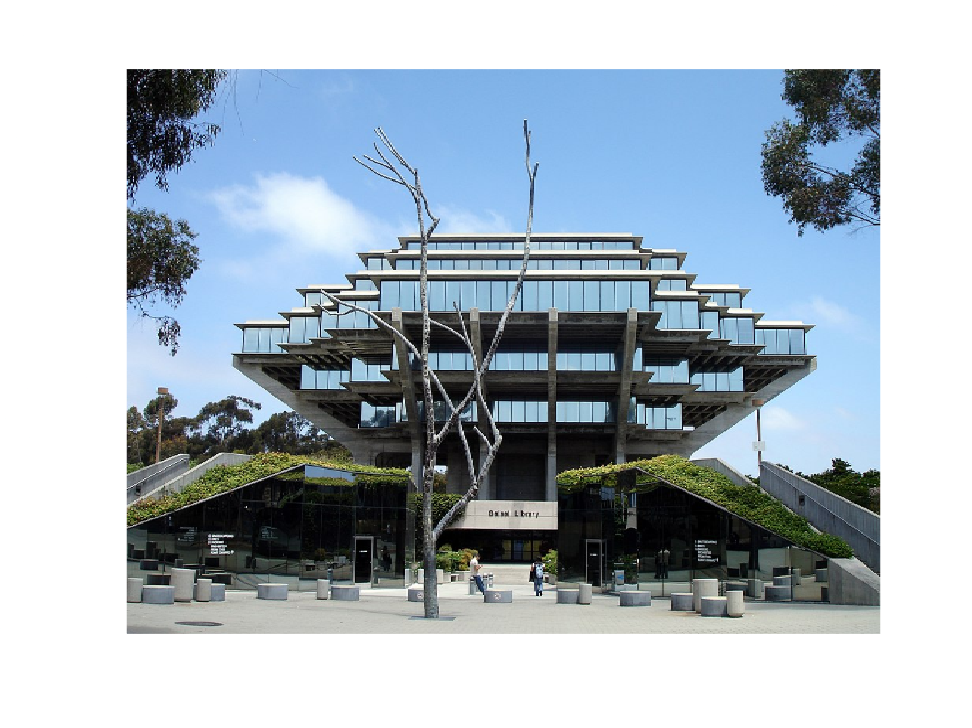

In [1]:
[A,map]=imread('Geisel Library.jpg');
imshow(A,map)


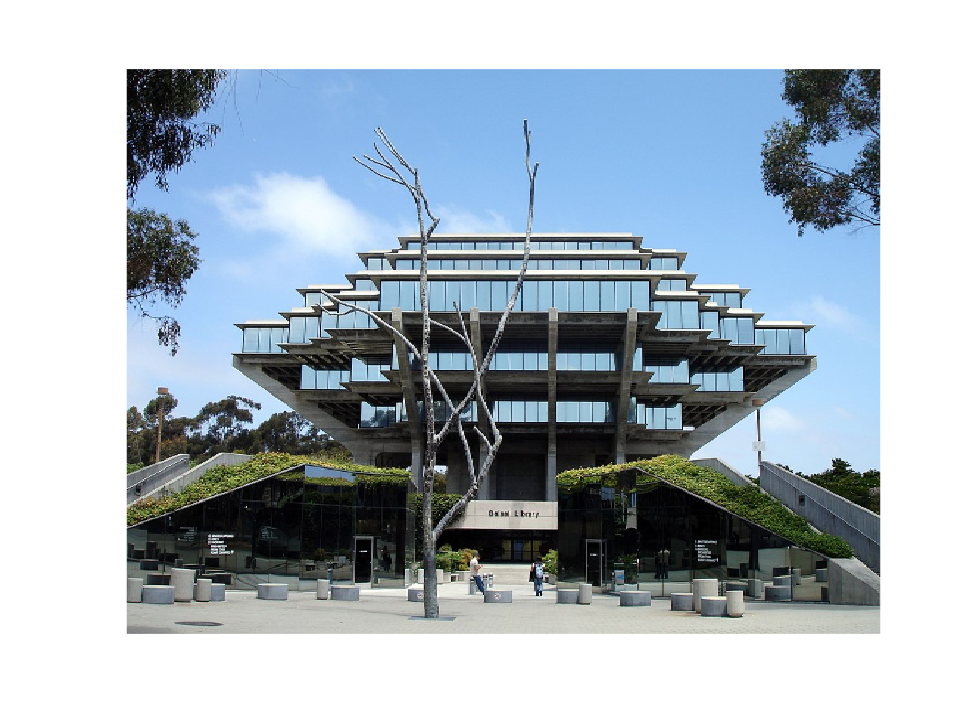

In [2]:
A=im2double(A);
imshow(A)


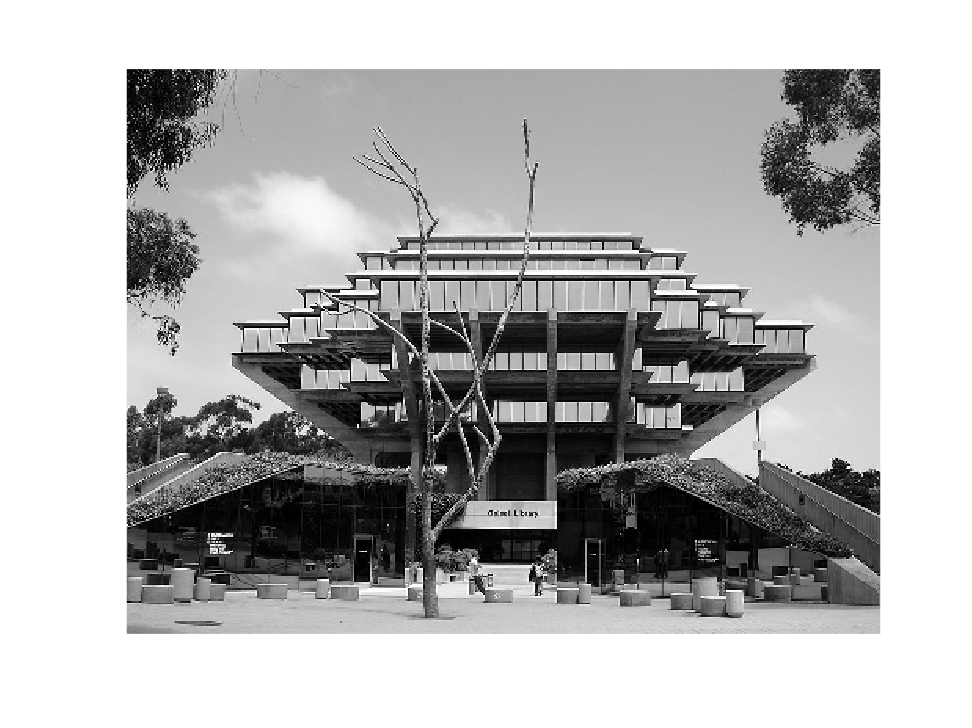

In [3]:
A=rgb2gray(A);
imshow(A)


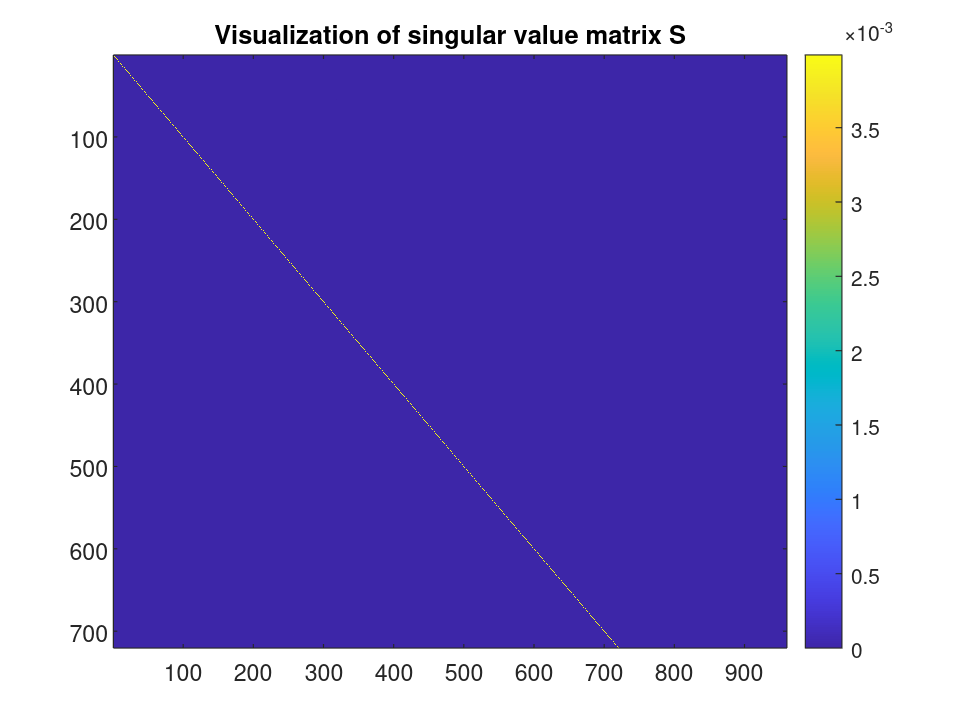

In [4]:
[U,S,V]=svd(A);
imagesc(S)
clim([0 mean(S,"all")]);
title('Visualization of singular value matrix S')
colorbar;

## Image compression using rank minimization

In [5]:
function [Xk,val] = compress(U,S,V,k)

X= U*S*V';
Uk = U(:,1:k);
Vk = V(:,1:k);
Sk = S(1:k,1:k);
Xk=Uk*Sk*Vk';
X_diff = Xk-X;
% Frobenius norm
val =sqrt(sum(X_diff.*X_diff,"all"));

end


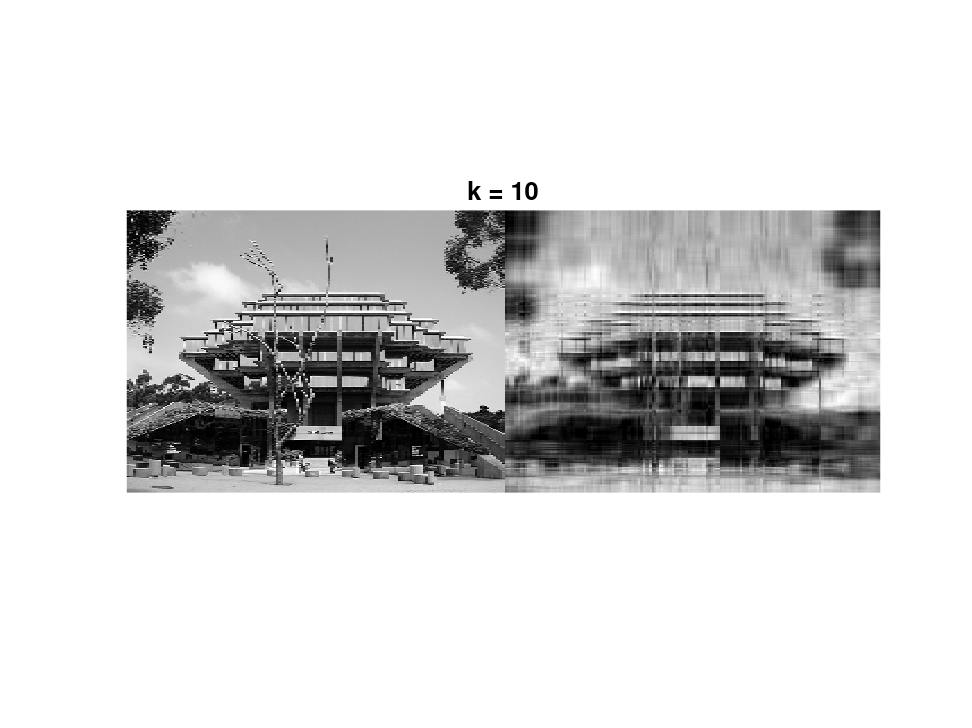


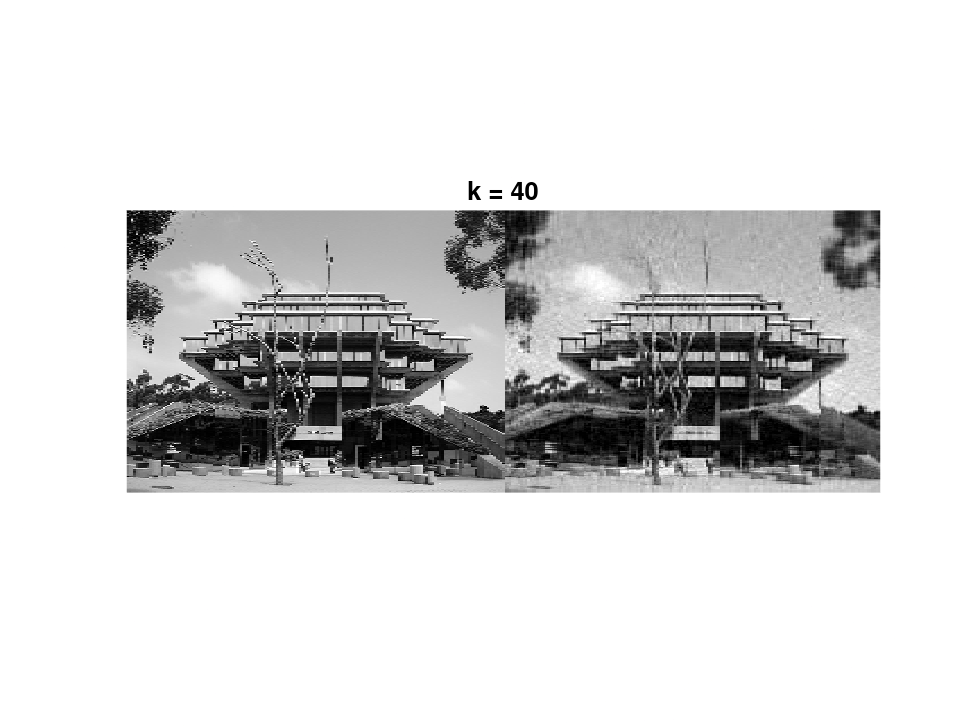

In [6]:
k = [10, 40, 80, 160];
Ak = zeros(size(A,1),size(A,2),length(k));
norm_val = zeros(1,length(k));

for i = 1:length(k)
    [Ak(:,:,i),norm_val(i)] = compress(U,S,V,k(i));
    figure
    montage({A,Ak(:,:,i)})
    str = ['k = ',num2str(k(i))];
    title(str);
end

<center>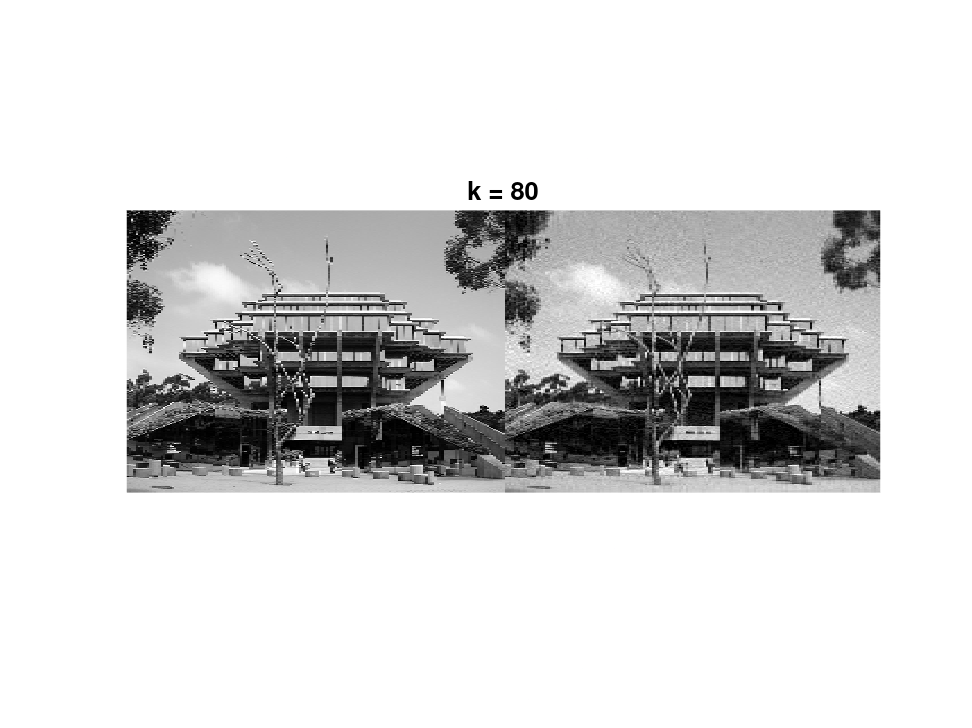</center>


<center>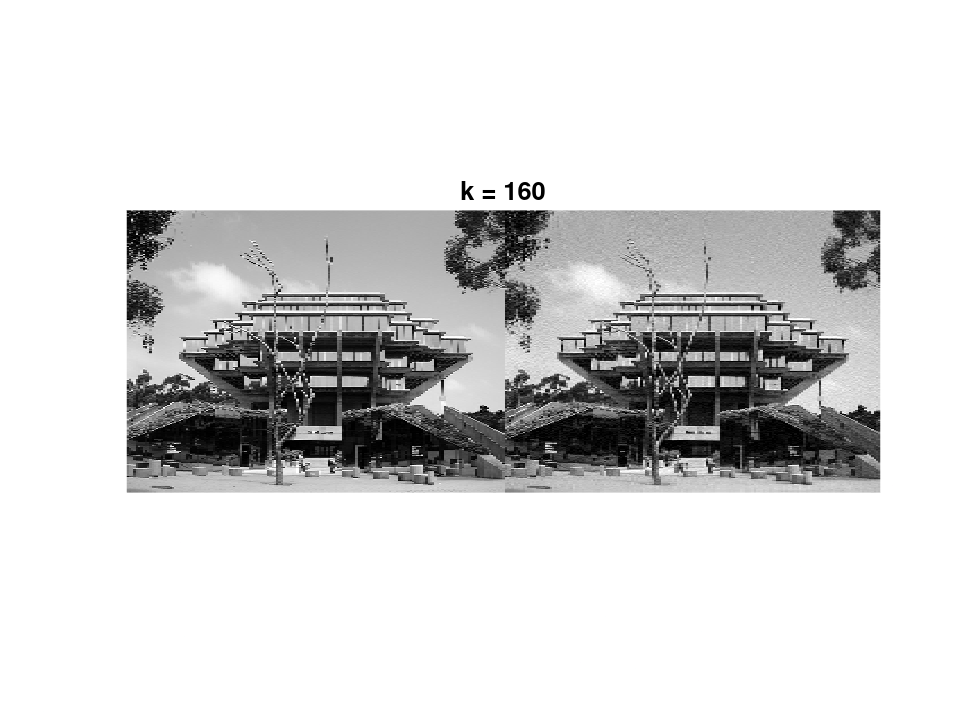</center>




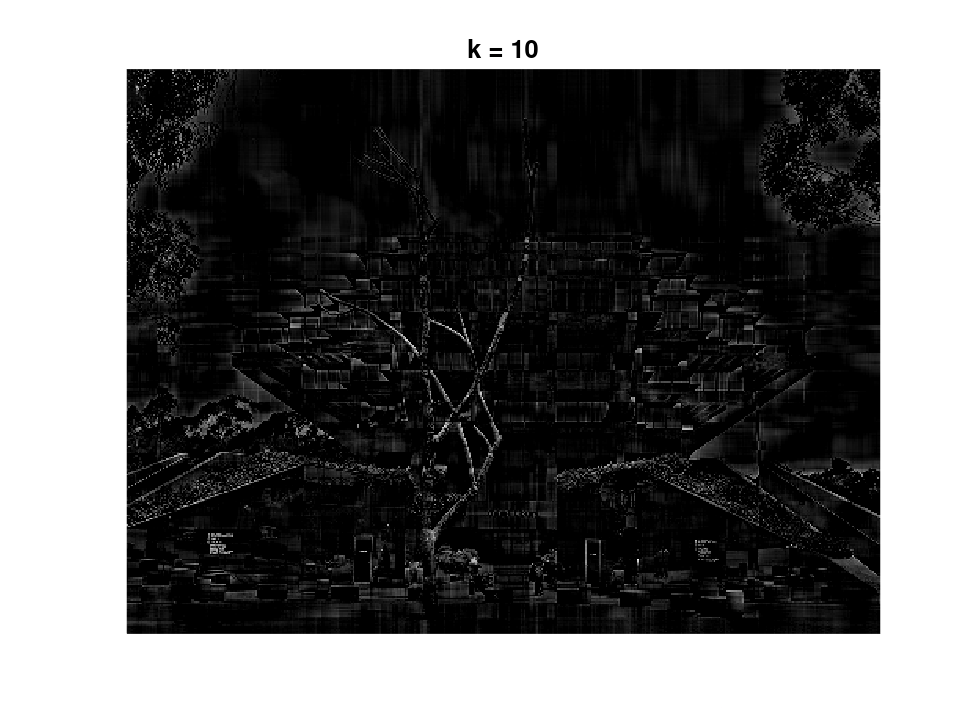


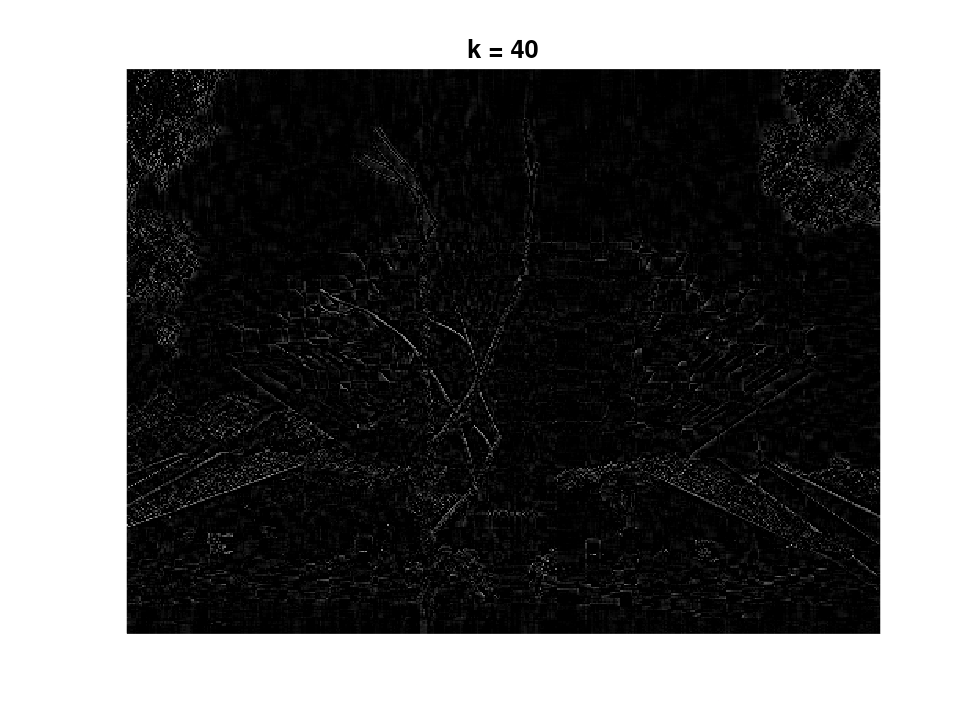

In [7]:
for i = 1:length(k)
    figure
    imshow(A-Ak(:,:,i))
    str = ['k = ',num2str(k(i))];
    title(str);
end

<center>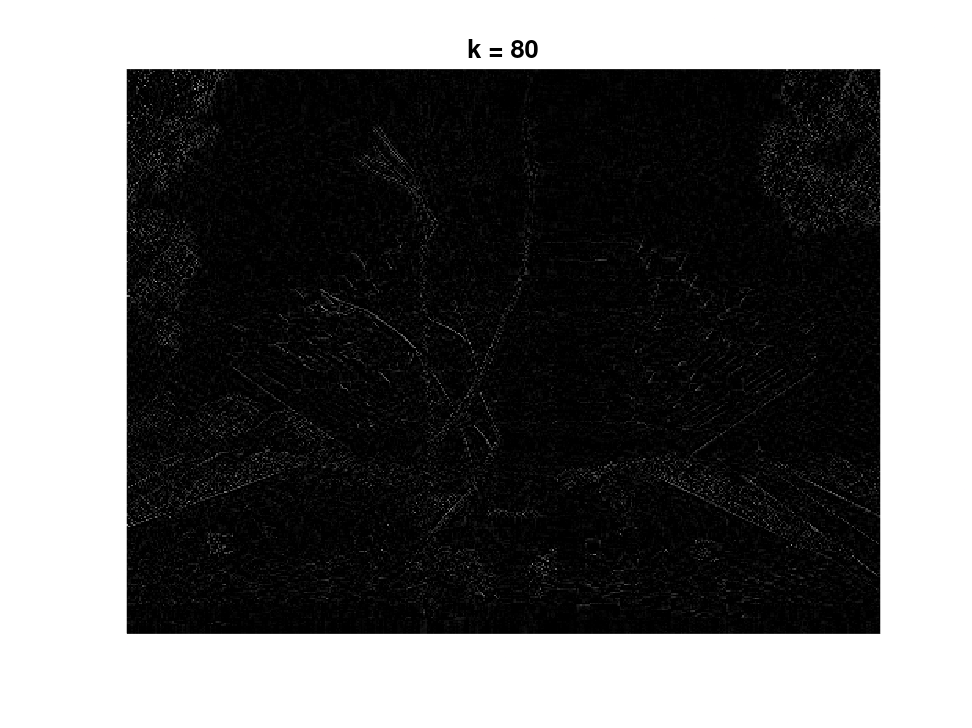</center>


<center>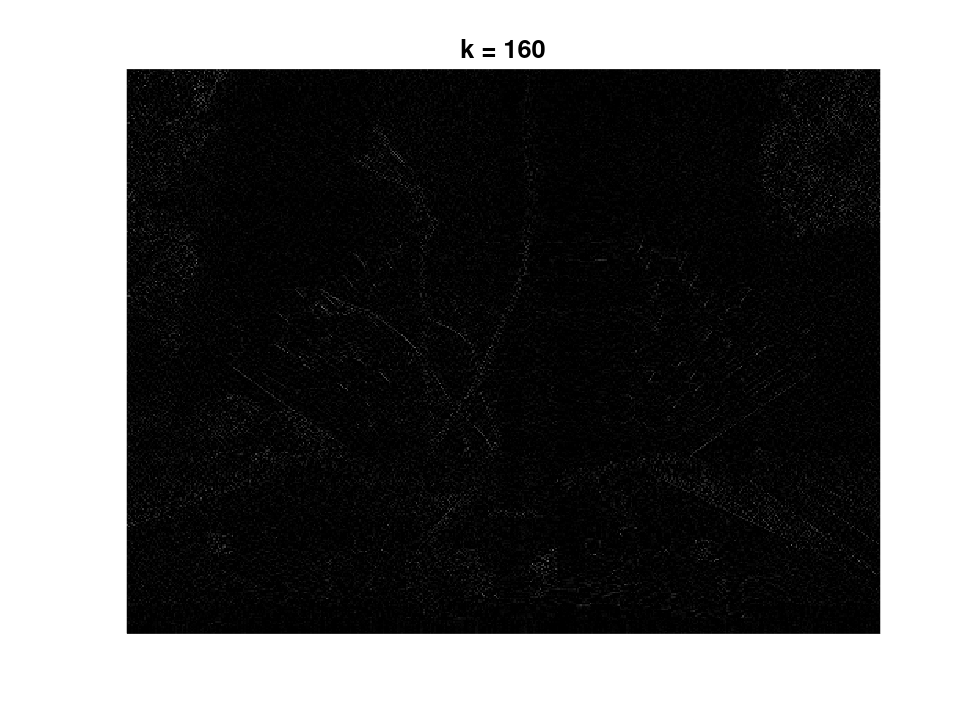</center>


For k = 10, the whole image seems blurred. As we increase k, the image becomes clearer, but still grainy (the sky is grainy). If the check the image obtained by difference between orignal and constructed, we can see the major differences are in the edges of the objects in the image (especially the tree). As k increases, the difference reduces.



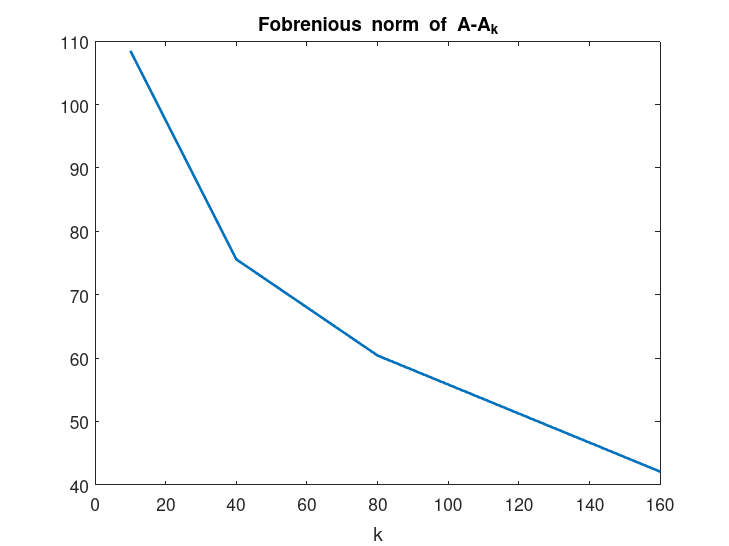

In [8]:
figure
plot(k,norm_val,'LineWidth',1.5)
title('Fobrenious norm of A-A_k')
xlabel('k')


The minimum number of elements required to describe the original image is $m\times n$ . If we use the SVD to save it as $U,S,V$ matrices, the number of elements would be $\left(m+n+1\right)r$ where $r$ is the rank of the matrix. If the rank of the matrix is $\min \left(m,n\right)$ , then using the singular value decomposed matrices takes more space than using the matrix directly. In the case of compression, the minimum number of elements required is $\left(m+n+1\right)k:U_k -m\times k,V_k -n\times k,S_k -k\times k$ (as $k\le \min \left(m,n\right)$ ) . So, total savings is $mn-(m+n+1)k$



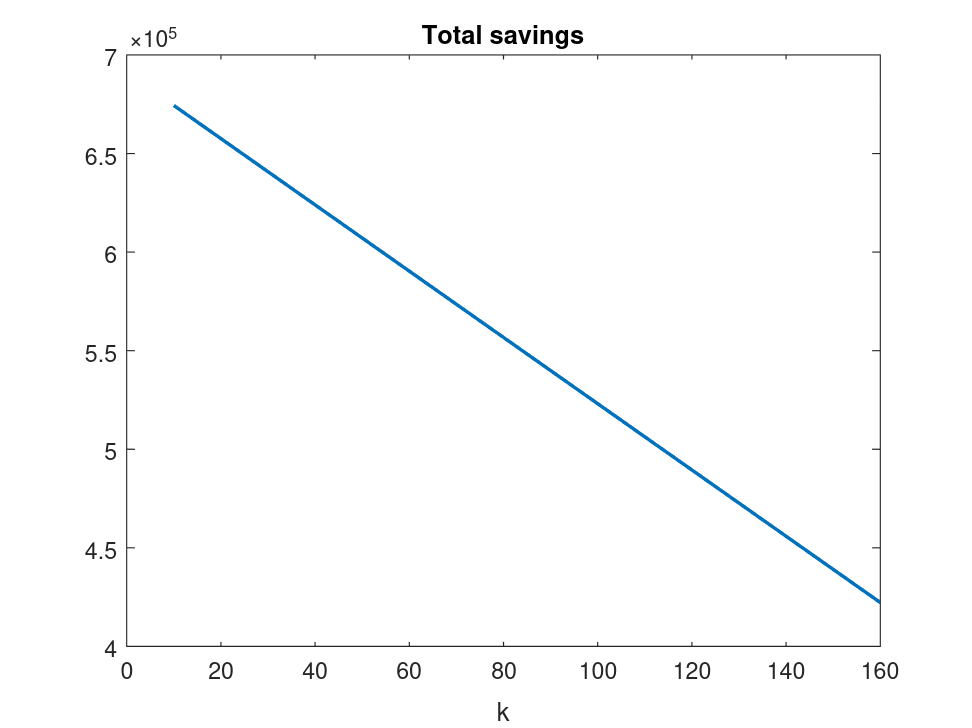

In [9]:
savings = size(A,1)*size(A,2)-(size(A,1)+size(A,2)+1).*k;
plot(k,savings,'LineWidth',1.5)
title('Total savings')
xlabel('k')

In [10]:
fprintf('The number of elements saved for k = 160 is %1.0f',savings(end))

The number of elements saved for k = 160 is 422240